# Score Based Comparisons

This notebook generates a set of visualizations relevant to the research question. However, the interpretation/analysis can be found in the accompanying paper.


## Preprocessing
Since we are interested in comparing how the *same* sanaa across different mizans, we had to find the overlapping sanaas in the 3 selected recordings. The available dataset does not give this information directly; to check if a sanaa is repeated, one has to check the lyrics lines corresponding to the rhythm sections and do string matching. Given that the dataset was small, determining what sanaas are overlapping across the recordings was conducted manually. 

Then, given the needed sanaas, the scores and audio were preprocessed into chunks relating to each sanaa. These subsets were created for the overlapping sanaas only. 

In [1]:
from music21 import *
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
from math import ceil

score_snippets = 'score_dest/'
audio_snippets = 'audio_dest/'

score_source_dir = 'score_source/'

dataset_file = 'arab_andalusian_lines.csv'

nawbas = {'f7bcb9af-6abb-4192-ae3d-37fa811034ce': 'quddam',
         '8842c1f0-e261-4069-bd59-768bb9a3315c': 'darj',
         'a451a7fc-c53f-462a-b3fc-4377bb588105': 'btayhi'}

#lists with beats that have a starting note
darj_beats_mu = [1.0, 1.5, 2.5, 3.5, 4]
darj_beats_ma = darj_beats_mu
darj_beats_in = darj_beats_mu
btayhi_beats_mu = [2, 4, 5.5, 7, 8]
btayhi_beats_ma = btayhi_beats_mu
btayhi_beats_in = [1.75, 2.5, 4, 4.5]
quddam_beats_mu = [1.5, 2, 3]
quddam_beats_ma = quddam_beats_mu
quddam_beats_in =  quddam_beats_mu #[2, 3, 4, 5]

#dictionary beats
mizan_dict = {
    'darj_mu': darj_beats_mu,
    'darj_ma': darj_beats_ma,
    'darj_in': [1, 2, 4, 6, 7], #re-read as 8/8 from book
    'btayhi_mu': btayhi_beats_mu,
    'btayhi_ma': btayhi_beats_ma,
    'btayhi_in': [2.5, 4, 7, 8], #re-read as 8/8 from book
    'quddam_mu': quddam_beats_mu,
    'quddam_ma': quddam_beats_ma,
    'quddam_in': quddam_beats_in
}

crossmizan_pairs = [('f7bcb9af-6abb-4192-ae3d-37fa811034ce-mu.2-[Barwala].xml', '8842c1f0-e261-4069-bd59-768bb9a3315c-mu.2-[Barwala].xml'),
                   ('8842c1f0-e261-4069-bd59-768bb9a3315c-in.2-[Zejel].xml', 'a451a7fc-c53f-462a-b3fc-4377bb588105-in.2-[Zejel].xml'), 
                   ('8842c1f0-e261-4069-bd59-768bb9a3315c-in.3-[Zejel].xml', 'a451a7fc-c53f-462a-b3fc-4377bb588105-in.4-[Zejel].xml'),
                   ('8842c1f0-e261-4069-bd59-768bb9a3315c-in.4-[Zejel].xml', 'a451a7fc-c53f-462a-b3fc-4377bb588105-in.5-[Zejel].xml'), 
                   ('8842c1f0-e261-4069-bd59-768bb9a3315c-in.5-[Zejel].xml', 'a451a7fc-c53f-462a-b3fc-4377bb588105-in.6-[Zejel].xml')]


## Initial Methodology: 
This is a re-implementation of notebook 2 in the course content, which was counting the notes that start at each beat of the usul (measure) from all the scores in the corpus which contain this usul. This idea was simply extended to the mizans of the Arab Andalusian corpus. 
The idea here is to see how many notes start at a given beat. This could be a way to represent how the rhythmic changes the arrangement of the melody (is arrangement a correct term?). And, since a sanaa should have the same melody even if played over different mizans, it is thought that seeing the distribution of this melody's notes over the beats of the measure for each of the mizans would help us capture differences.

In [2]:
def show_pair(score_snippets_dir, pair, label, mizan_dict, nawbas): #by label: muwassa, mahzuz, or insiraf
    stream1 = converter.parse(score_snippets_dir + pair[0])
    stream2 = converter.parse(score_snippets_dir + pair[1])
    
    notes_stream1 = stream1.parts[0].flat.notes.stream()
    notes_stream2 = stream2.parts[0].flat.notes.stream()
    
    beatsDict1 = {}
    for n in notes_stream1:
        beatsDict1[n.beat] = beatsDict1.get(n.beat, 0) + 1
        
    beatsDict2 = {}
    for n in notes_stream2:
        beatsDict2[n.beat] = beatsDict2.get(n.beat, 0) + 1 
        
    #plots
    xValues1 = sorted(beatsDict1.keys())
    yValues1 = [beatsDict1[x] for x in xValues1]

    xValues2 = sorted(beatsDict2.keys())
    yValues2 = [beatsDict2[x] for x in xValues2]
    
    mbid1 = pair[0][:36]
    mbid2 = pair[1][:36]
    
    beats_theory1 = mizan_dict["{}_{}".format(nawbas[mbid1], label)]
    beats_theory2 = mizan_dict["{}_{}".format(nawbas[mbid2], label)]
    
    plt.subplot(1, 2, 1)
    plt.title(pair[0][:5]+ pair[0][36:])
    plt.bar(xValues1, yValues1, width=0.2)
    # Draw a vertical red line to better compare the results with theory
    for beat in beats_theory1:
        plt.axvline(beat, color='red')
    
    plt.xticks(beats_theory1)

    plt.subplot(1, 2, 2)
    plt.title(pair[1][:5]+ pair[1][36:])
    plt.bar(xValues2, yValues2, width=0.2)
    # Draw a vertical red line to better compare the results with theory
    for beat in beats_theory2:
        plt.axvline(beat, color='red')
        
    plt.xticks(beats_theory2)

    plt.show()

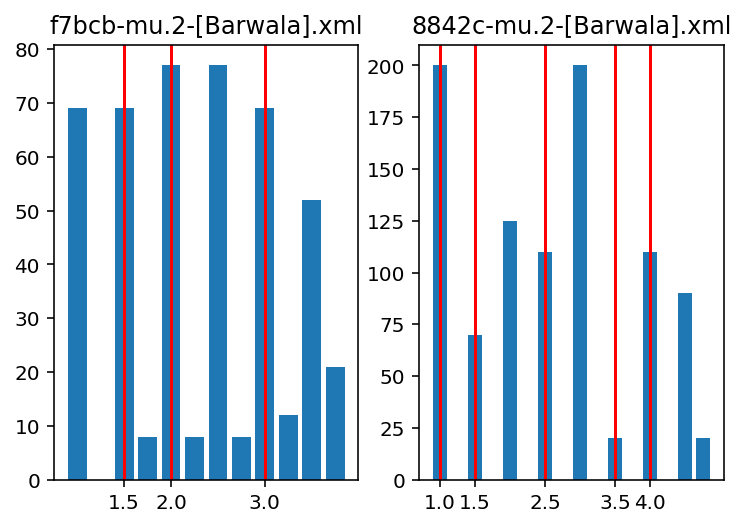

In [3]:
show_pair(score_snippets, crossmizan_pairs[0], 'mu', mizan_dict, nawbas)

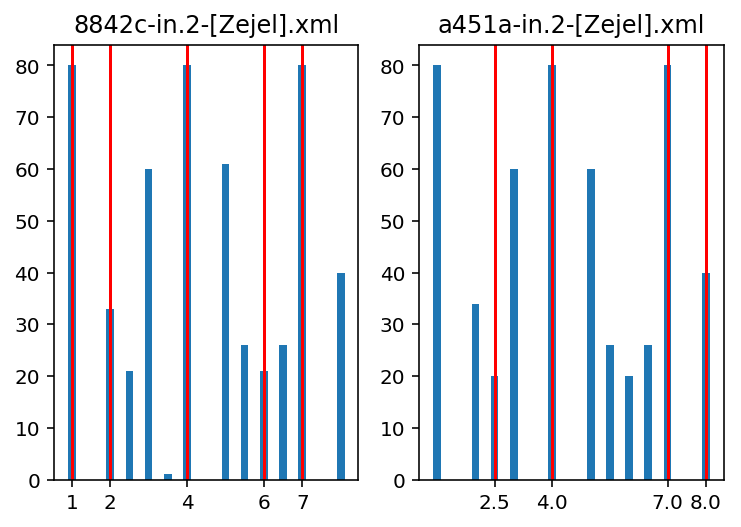

In [4]:
show_pair(score_snippets, crossmizan_pairs[1], 'in', mizan_dict, nawbas)

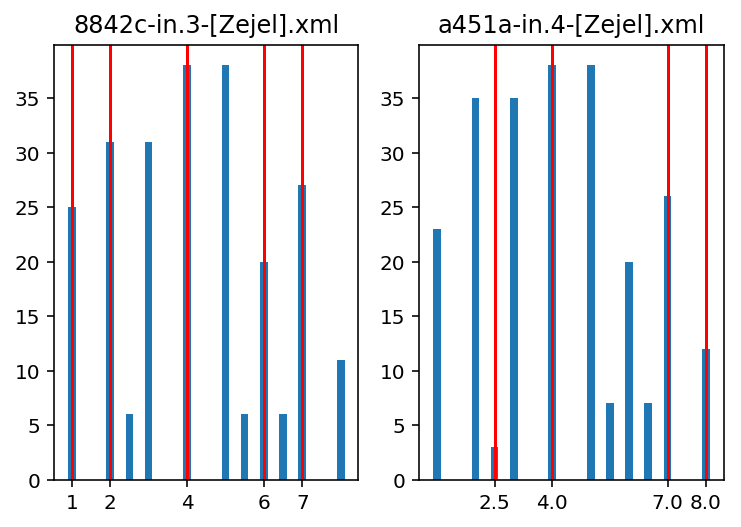

In [5]:
show_pair(score_snippets, crossmizan_pairs[2], 'in', mizan_dict, nawbas)

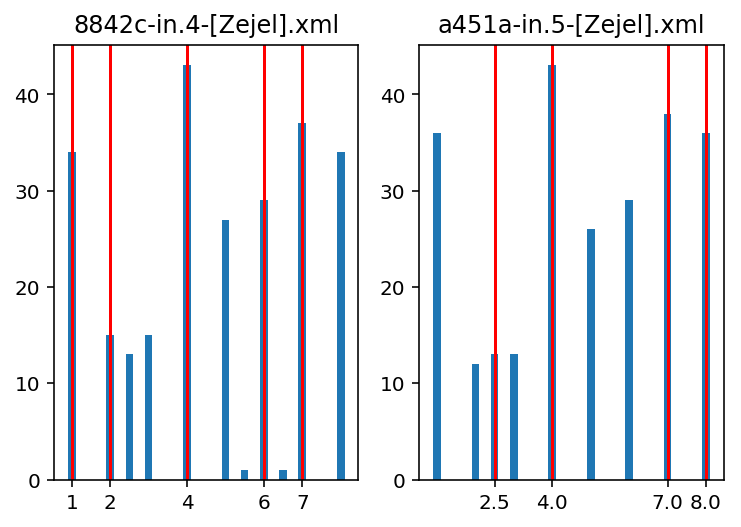

In [240]:
show_pair(score_snippets, crossmizan_pairs[3], 'in', mizan_dict, nawbas)

## (HERE, PUT SOUND CLIPS FOR THE SANAAS)

The first pair of sanaas look very different. However, all the remaining pairs of sanaas are almost identical. Perhaps this is a reflection of the distances between the mizan pairs themselves. 

(Note: in the presentation, it might be useful to show the rhythm pattern pics for each, and a sound clip)
The insiraf in Darj and Btayhi are both in 4/4. But the rhythm patterns are quite different. 

Regarding the first set of pairs (the different):
1. Darj has more total notes than quddam(evident on the y axis)

2. Darj: emphasis on 1 and 3. Quddam: Emphasis on 1.5, 2, and 3 in the score. 

The relationships between the distribution of notes and the percussion beats of the mizan (aka the red lines) are NOT of utmost importance in terms of identifying what exactly the differences are. Mainly, just seeing a different distribution of notes is enough to know that there is a difference. So even though these red lines are useful for us to contextualize the note distributions of each sanaa, they don't answer our question per se.

However, it feels more natural to extend the question further. So, now that we can see there is a difference (at least for the first pair), but we can't say much about it. In addressing point 1 from above, why does the darj rendition of the sanaa have more notes overall?. As for point 2, do the note distributions for all sanaas played in darj mizan have a similar note distributions? and likewise for all sanaas played in quddam?

Also, for the pair that was very similar, why are they that similar? Is this due to a similarity between the 2 mizan patterns in general, or was it a coincidence only for our small sample set

Consequently, the following set of items will be explored by score and dataset analysis: 

1. Follow up Question 1) Is the relationship between number of notes per beat, and the main percussion beats of the mizan, consistent across all the sanaas within each mizan? This is an attempt to make sense of why the notes were distributed that way in the initial sanaa observations

2. Follow up Question 2) Considering the 2 sanaa renditions above (sfrat l'ashiy in darj and quddam), what could be the reason for discrepancy in the total number of notes? How many bars are performed in each rendition? Maybe one sanaa has more instrumental interludes than the other and this would account for that? So, print the number of vocal bars and number of instrumental bars for each of the sanaas. Actually, there is no need since we can find the offsets from the updated dataset. Also, we can make these comparisons but on a more finer grain than the sanaa level.

3. Follow up Question 3) On the note level: 1. Since they are the same sanaa, then they should have the same notes (more or less, this is a hypothesis of course). How are phrases divided into the beats of the bar depending on the mizan? How could this be computed using the score?

This is also a relevant digression, that will not be explored for the scope of this project:
1. Do these note distributions generalize to other scores of these mizans (in different nawbas even)

Regarding the other pairs (the ones that are almost identical)
The similarities between the pairs: 
- It points out that: if the rhythm is mainly captured by the percussion pattern and not the distribution of beats in the measure, then how are the mizan differences captured other than through the percussions? (This hypothesis could be validated/denied with onset detection)
- How do all other insiraf’s look like in these mizans? Do they have the same distribution, or are they different? If they are different then it is the relationship to the lyrics that is causing a particular distribution
- Can the way the relationships between the insirafs within a recording help us identify which are closer related and which insiraf/s could in fact have been borrowed from another mizan?
- If the rhythm is not reflected in the starting notes distribution, maybe the stress of the syllables in the rhythmic patterns in audio is a better characterization?


In [6]:
#See whether the pattern observed occurs in all sanaas of our 2 recordings.
def get_sanaa_info(sanaa_string, recording_mbid, dataframe): #returns: 1.list of all lines relating to this sanaa, 2. tuple with start and end offsets
    regex_string = sanaa_string + '.*'
    lines = [x[1] for x in dataframe.iterrows() if x[1][0] == recording_mbid
             and re.match(regex_string, x[1][1])]
    return lines, (lines[0]['offset_start'], lines[-1]['offset_end'])

def get_beat_dictionary(scores_path, recording_mbid, score_start_offset, score_end_offset):
    beatsDict = {}
    score = converter.parse(scores_path + recording_mbid + '.xml')
    p = score.parts[0]
    segment = p.getElementsByOffset(score_start_offset, score_end_offset,
                              mustBeginInSpan=False,
                              includeElementsThatEndAtStart=False).stream()
    notes_stream = segment.flat.notes.stream()
    for n in notes_stream:
        beatsDict[n.beat] = beatsDict.get(n.beat, 0) + 1 
    return beatsDict

def get_sanaa_ids(recording_mbid, dataframe): #returns a list of unique sanaa ids
    #we can change this later to get the line annotation details as well
    linesections = (dataframe.loc[dataframe['mbid'] == recording_mbid])['verse_name'].unique()
    return set([l[0:4] for l in linesections])

def get_sanaa_lines_and_offsets(recording_mbid, dataset):
    sanaa_lines = {}   #lines belonging to each sanaa in a recording
    sanaa_offsets = {} #offsets marking the start and end of a sanaa in a recording
    
    all_recordings_sanaa_offsets = {}
    all_recordings_sanaa_lines = {}
    s_ids = get_sanaa_ids(recording_mbid, dataset)
    for s_id in s_ids:
        sanaa_lines[s_id], sanaa_offsets[s_id] = get_sanaa_info(s_id, recording_mbid, dataset)
    return sanaa_offsets, sanaa_lines
    
#load the file
dataset = pd.read_csv(dataset_file)

all_recordings_sanaa_offsets = {}
all_recordings_sanaa_lines = {}

for recording_mbid in nawbas.keys():
    all_recordings_sanaa_offsets[recording_mbid], all_recordings_sanaa_lines[recording_mbid] = get_sanaa_lines_and_offsets(recording_mbid, dataset)

#3. Get the beats dictionary for each sanaa in ONE recording. 
beats_dict_per_sanaa_f7bcb = {}

for key, val in all_recordings_sanaa_offsets['f7bcb9af-6abb-4192-ae3d-37fa811034ce'].items():
    beats_dict_per_sanaa_f7bcb[key] = get_beat_dictionary(score_source_dir, 
                                                          'f7bcb9af-6abb-4192-ae3d-37fa811034ce', val[0], val[1])
    
beats_dict_per_sanaa_8842c1 = {}
for key, val in all_recordings_sanaa_offsets['8842c1f0-e261-4069-bd59-768bb9a3315c'].items():
    beats_dict_per_sanaa_8842c1[key] = get_beat_dictionary(score_source_dir, 
                                                           '8842c1f0-e261-4069-bd59-768bb9a3315c', val[0], val[1])

beats_dict_per_sanaa_a451a7 = {}
for key, val in all_recordings_sanaa_offsets['a451a7fc-c53f-462a-b3fc-4377bb588105'].items():
    beats_dict_per_sanaa_a451a7[key] = get_beat_dictionary(score_source_dir, 
                                                           'a451a7fc-c53f-462a-b3fc-4377bb588105', val[0], val[1])



In [7]:
print(beats_dict_per_sanaa_f7bcb['in.5']) #the insiraf beat info is causing a problem in plotting..

{1.0: 141, Fraction(5, 3): 146, Fraction(7, 3): 138, 2.0: 55, Fraction(8, 3): 6, Fraction(4, 3): 3}


In [8]:
def plot_all(beats_dict_per_sanaa, recording_mbid, mizan_dict, nawbas): 
    #plots all input elements side by side with their titles
    rows = ceil(len(beats_dict_per_sanaa)/4.0) #to have only 4 per row
    i = 1
    plt.figure(figsize=(20,20))
    plt.suptitle('{}-{}'.format(recording_mbid, nawbas[recording_mbid]), fontsize=24)

    for key, beats_dict in sorted(beats_dict_per_sanaa.items()):
        plt.subplot(rows, 4, i)
        i += 1
        plt.title(key)
        mizan_key = "{}_{}".format(nawbas[recording_mbid], key[0:2])
        reference = mizan_dict[mizan_key]
        
        #plots
        xValues = sorted(beats_dict.keys())
        yValues = [beats_dict[x] for x in xValues]
        
        plt.bar(xValues, yValues, width=0.2)
        # Draw a vertical red line to better compare the results with theory
        for beat in reference:
            plt.axvline(beat, color='red')
        plt.xticks(reference)
    plt.show()
    

Note: in the plots below, there is a problem with the insiraf alignment. However this will be handled later. This can be debugged possibly by reading from the score snippet one of the insirafs (in 6/8 time) and see how the beats are read and where the bug is.

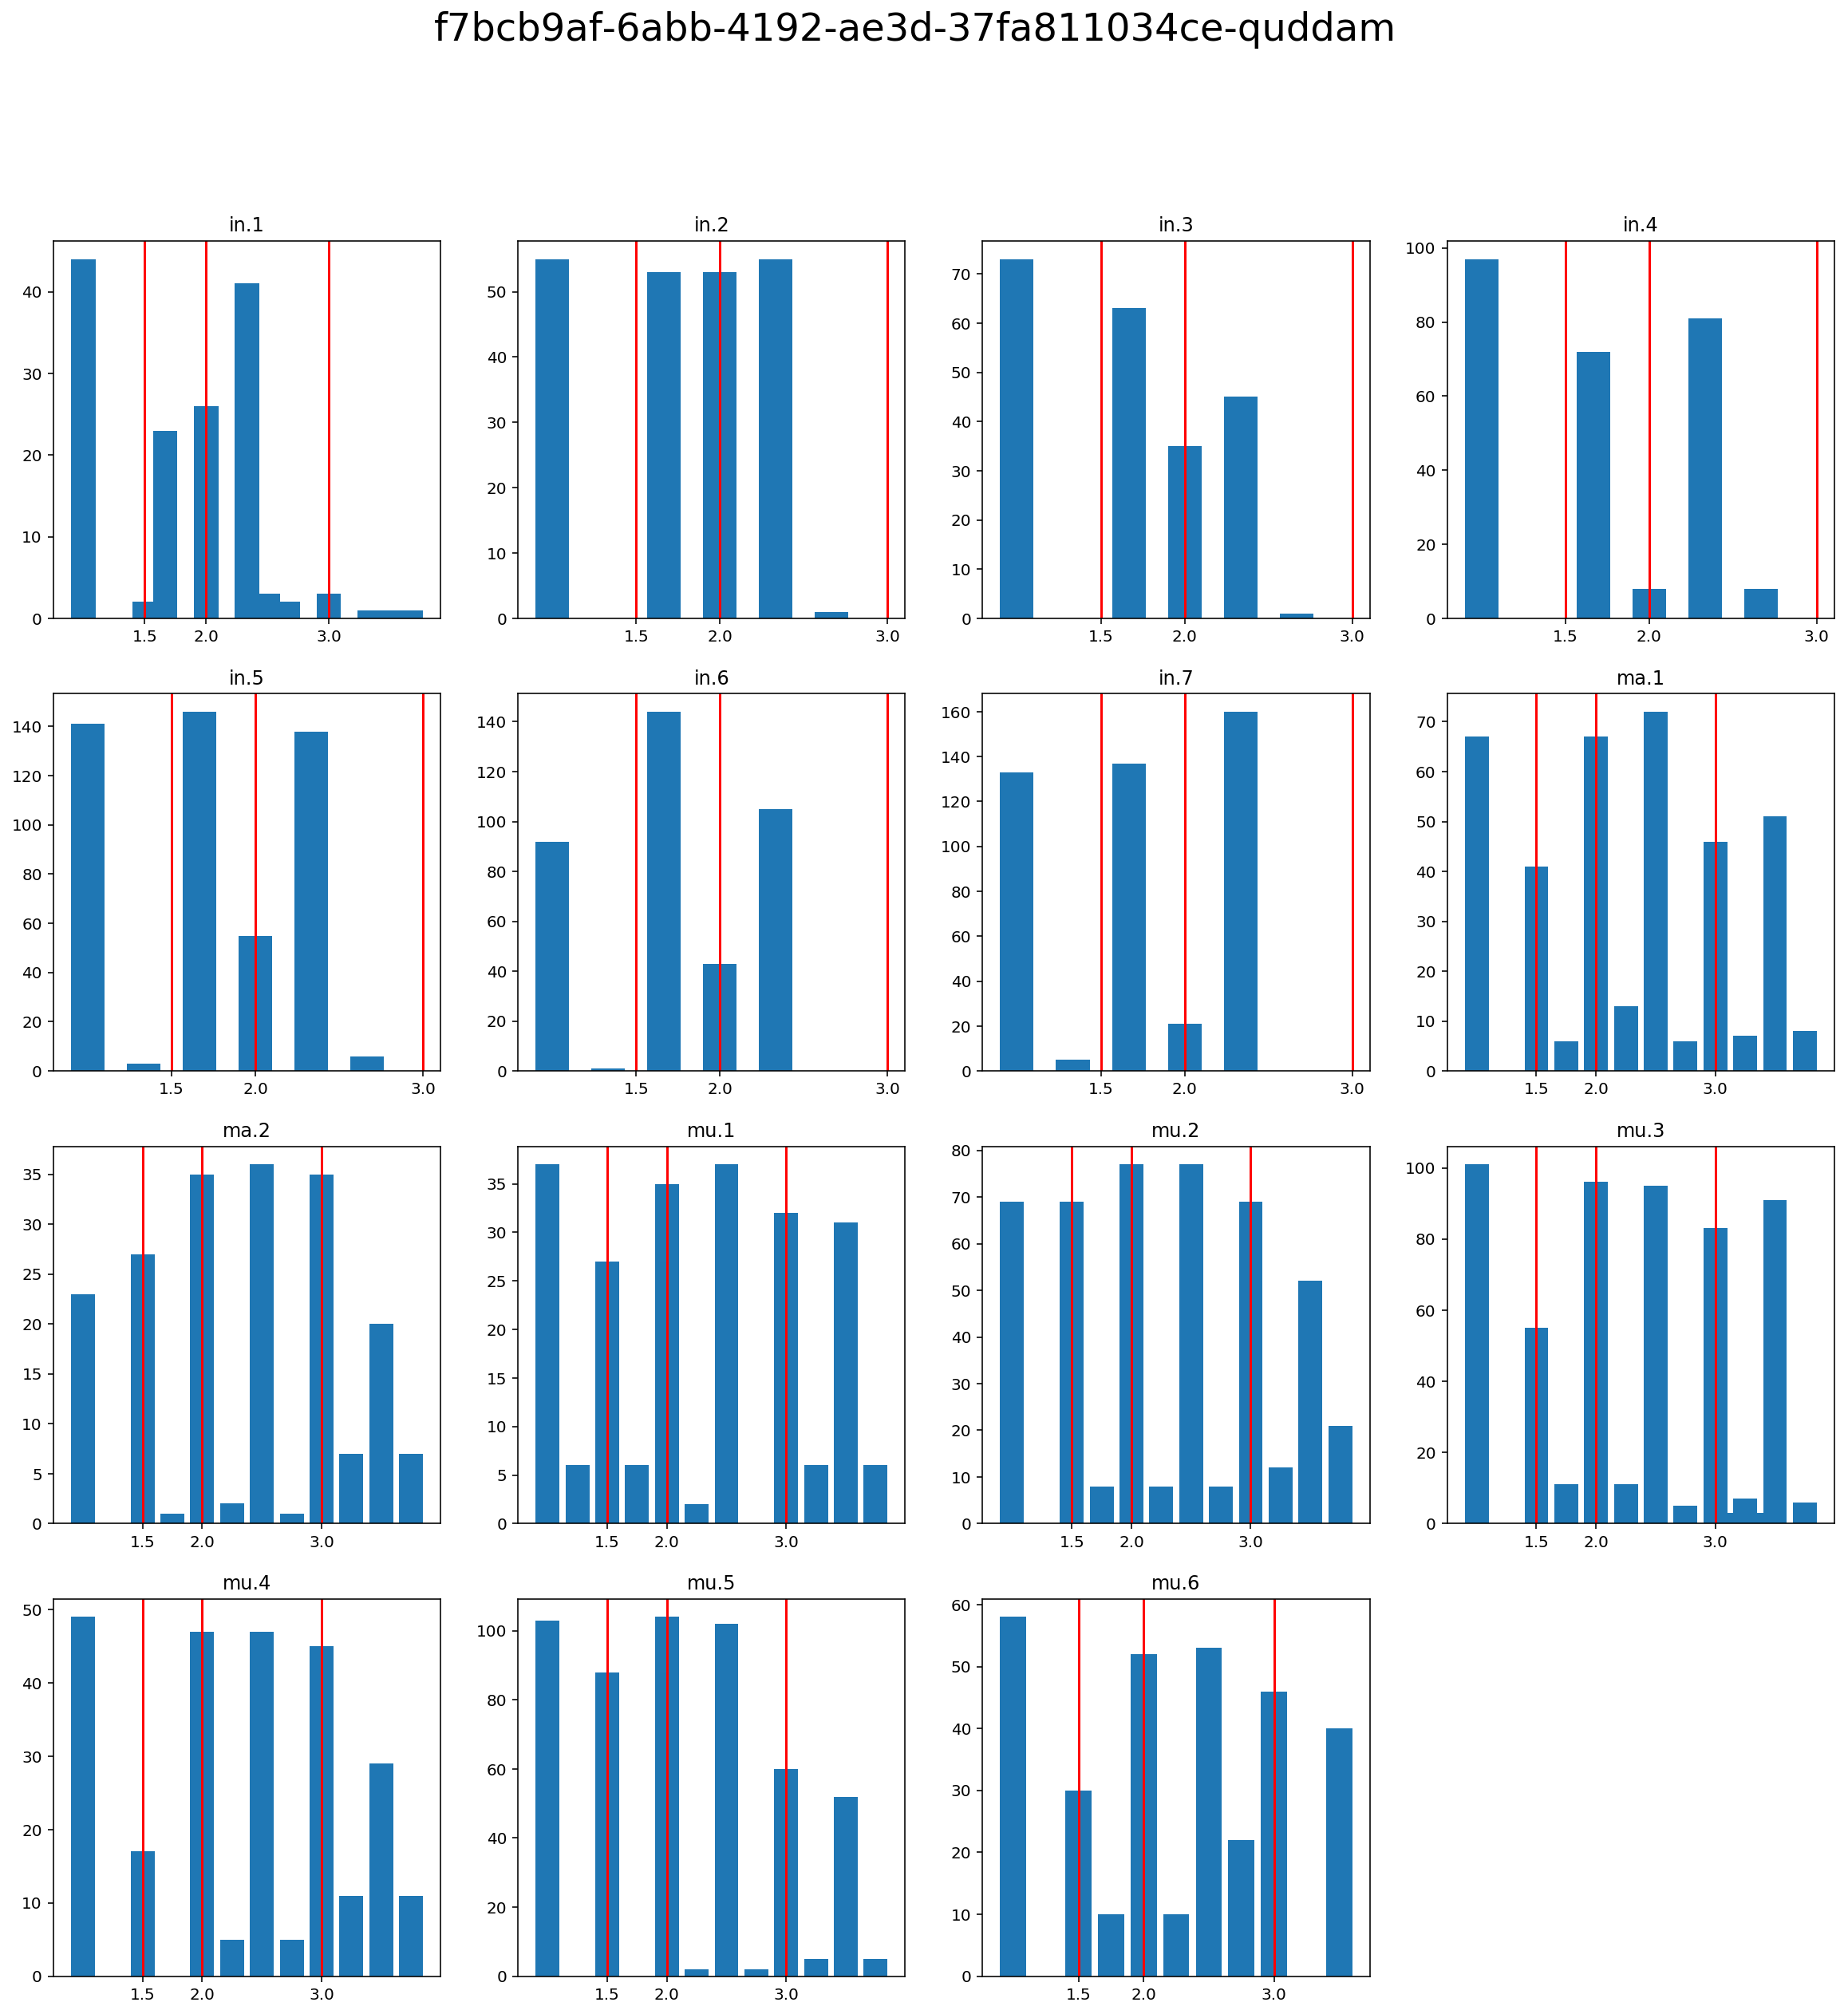

In [9]:
plot_all(beats_dict_per_sanaa_f7bcb, 'f7bcb9af-6abb-4192-ae3d-37fa811034ce', mizan_dict, nawbas)

The problem with the insirafs here is the other way round. Theory is 6/8, and the score is 6/8, but something wrong happens when reading the beats dict

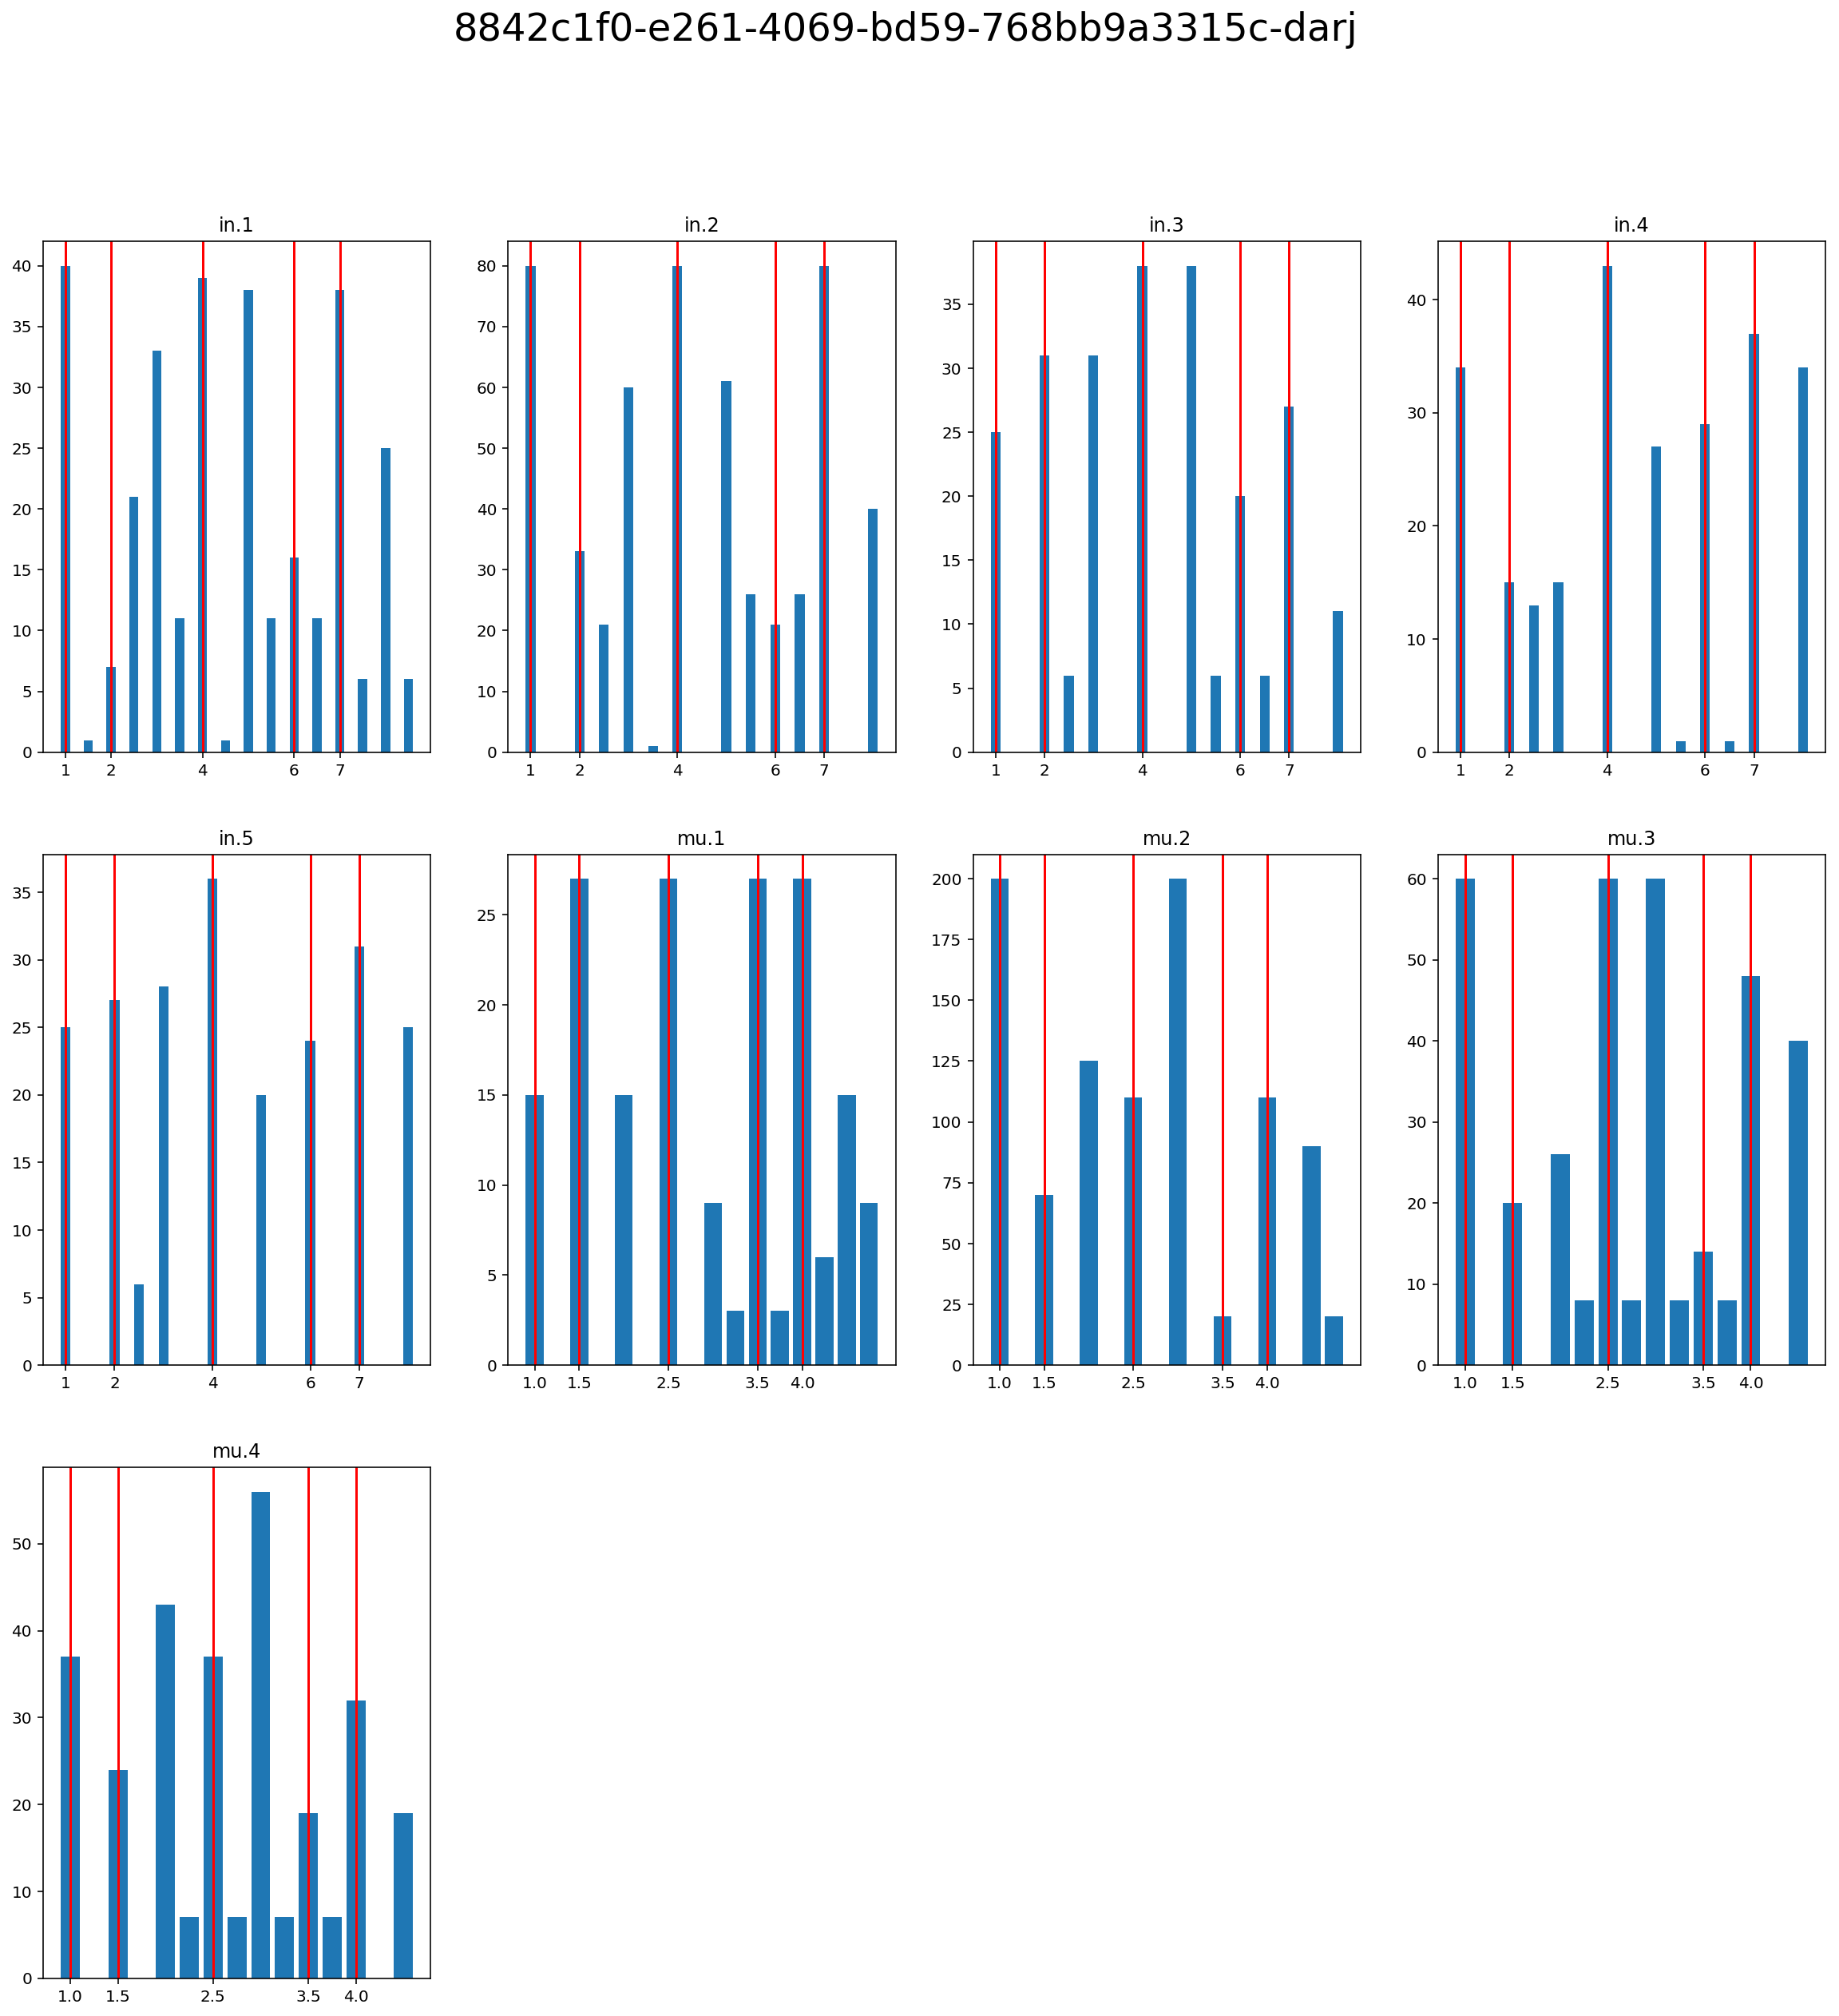

In [242]:
plot_all(beats_dict_per_sanaa_8842c1, '8842c1f0-e261-4069-bd59-768bb9a3315c', mizan_dict, nawbas)
#we will only look at the muwassa' results here because the insiraf are not showing and there is a bug (most likely similar to the insiraf bug in the above),
#but those will be debugged before the paper.

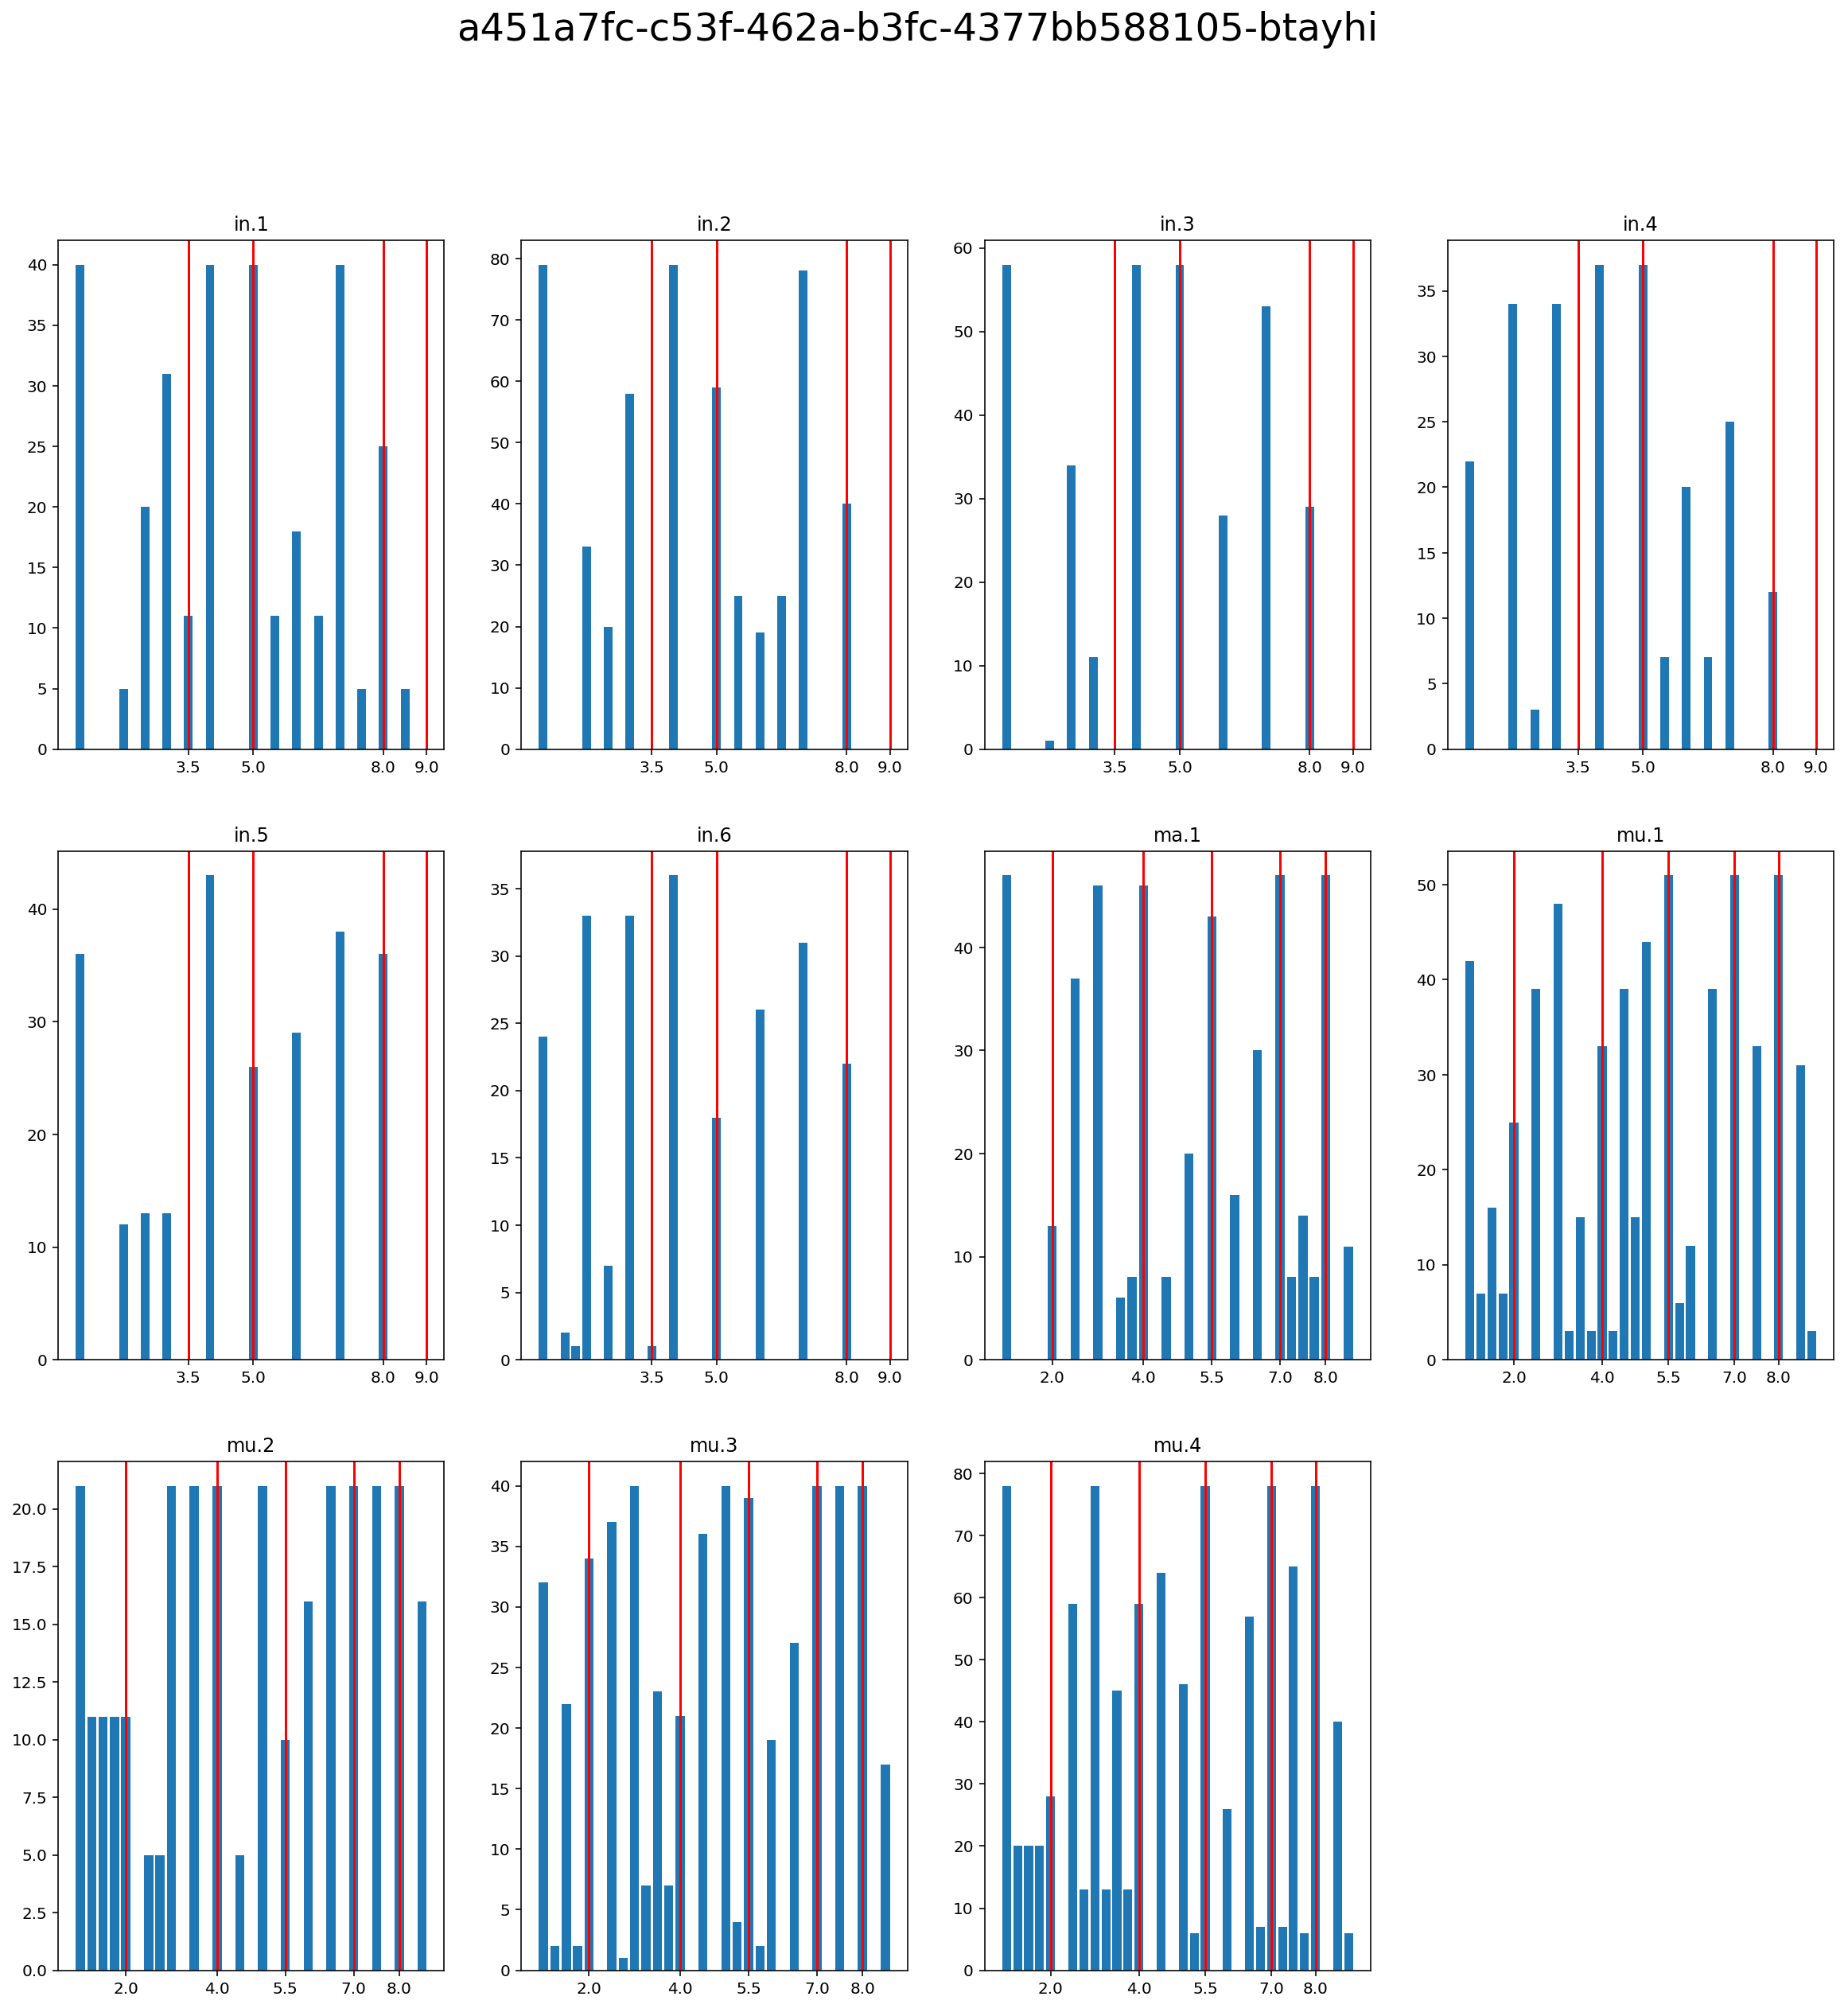

In [235]:
plot_all(beats_dict_per_sanaa_a451a7, 'a451a7fc-c53f-462a-b3fc-4377bb588105', mizan_dict, nawbas)

point:
justify the question 
talk about the methodolgy
and explain the results

1. go through the process of symbollic analysis
2. use an academic source (done, amin’s book and the rhythmic part)
3. Think of the music
4. Discuss the results with respect to the music.
2 pages average, 4 pages MAX

## Conclusion From Above Plots

## Limitations